In [1]:
import rawdata as dp
import signal_generator as sig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:
data = dp.fetch_ohlcv_online(start_date='2023-01-01', end_date='2025-01-01')
signals = sig.MACD(data['Close'], signal_window=3)

signals
# signals[signals['signal'] != 0]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,signal
0,16625.080078,0.0
1,16688.470703,1.0
2,16679.857422,0.0
3,16863.238281,0.0
4,16836.736328,0.0
...,...,...
726,94164.859375,0.0
727,95163.929688,0.0
728,93530.226562,0.0
729,92643.210938,0.0


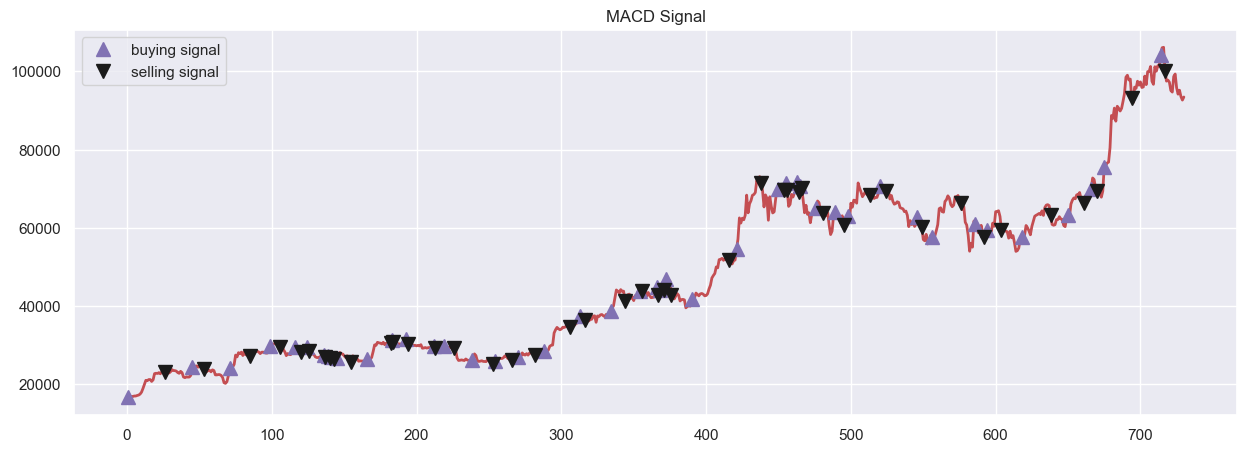

In [3]:
buy_indices = signals.index[signals['signal'] == 1].tolist()
sell_indices = signals.index[signals['signal'] == -1].tolist()

fig = plt.figure(figsize = (15,5))
plt.plot(signals['Close'], color='r', lw=2.)
plt.plot(signals['Close'], '^', markersize=10, color='m', label = 'buying signal', markevery = buy_indices)
plt.plot(signals['Close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = sell_indices)
plt.title('MACD Signal')
plt.legend()
plt.show()

In [4]:
import signal_labeller as sc

signals = signals[:-40]

signal_indices = signals.index[signals['signal'] != 0].tolist()

signals['score'] = 0
for i in signal_indices:
    score = sc.classify_signal(i, signals)
    signals.loc[i, 'score'] = score

signals

/var/folders/54/9m1dh2kj565gsww4_f2jdm5r0000gn/T/ipykernel_75100/2283644635.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['score'] = 0


,Close,signal,score
0,16625.080078,0.0,0.0
1,16688.470703,1.0,1.0
2,16679.857422,0.0,0.0
3,16863.238281,0.0,0.0
4,16836.736328,0.0,0.0
...,...,...,...
686,89845.851562,0.0,0.0
687,90542.640625,0.0,0.0
688,92343.789062,0.0,0.0
689,94339.492188,0.0,0.0


In [8]:
from collections import Counter
Counter(signals['score'])

Counter({0.0: 640, 1.0: 47, nan: 1, nan: 1, nan: 1, nan: 1})

In [10]:
signals['final_signal'] = signals['signal'][signals['score'] > 0]

buy_indices = signals.index[signals['final_signal'] == 1].tolist()
sell_indices = signals.index[signals['final_signal'] == -1].tolist()

/var/folders/54/9m1dh2kj565gsww4_f2jdm5r0000gn/T/ipykernel_75100/3527275329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['final_signal'] = signals['signal'][signals['score'] > 0]


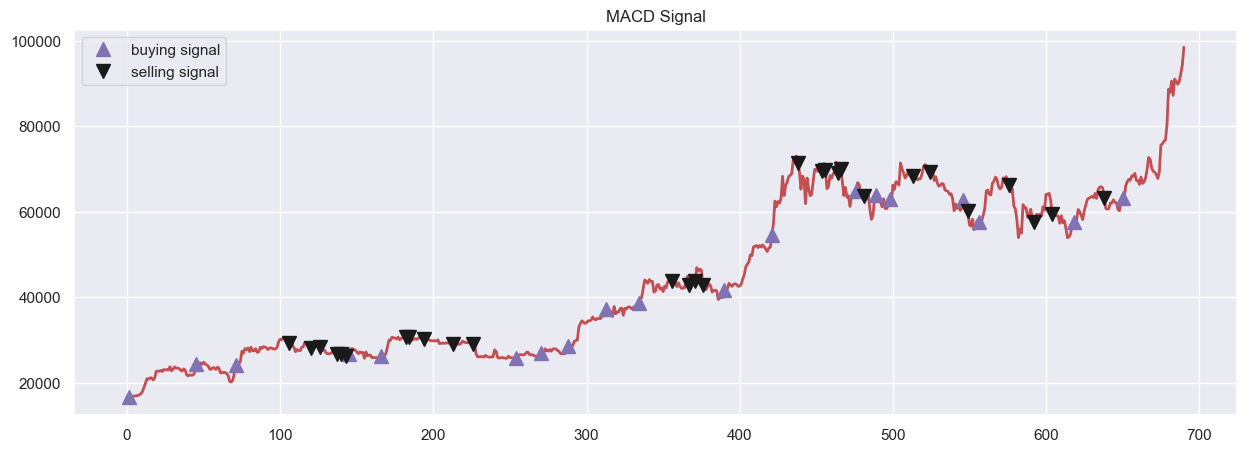

In [ ]:
buy_indices = signals.index[signals['final_buy_signal'] == 1].tolist()
sell_indices = signals.index[signals['final_sell_signal'] == 1].tolist()
 
fig = plt.figure(figsize = (15,5))
plt.plot(signals['Close'], color='r', lw=2.)
plt.plot(signals['Close'], '^', markersize=10, color='m', label = 'buying signal', markevery = buy_indices)
plt.plot(signals['Close'], 'v', markersize=10, color='k', label = 'selling signal', markevery = sell_indices)
plt.title('MACD Signal')
plt.legend()
plt.show()